### What is the relationship between Country and Revenue?

c:\Users\ayah\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


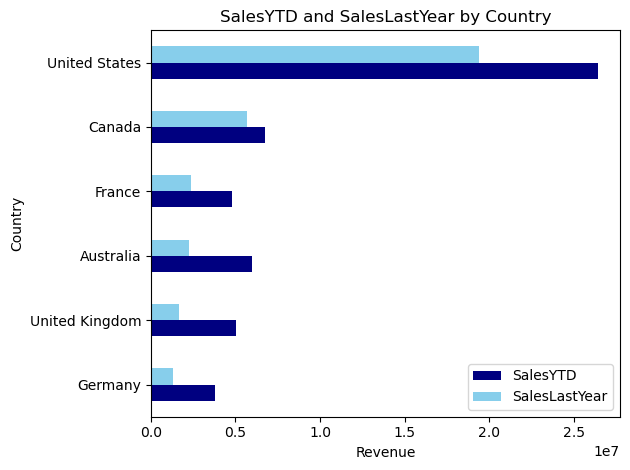

In [1]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt

# Establish a database connection
conn = pyodbc.connect(
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=********\SQLEXPRESS;'
    r'DATABASE=AdventureWorks2022;'
    r'Trusted_Connection=yes;'
)

# Define the SQL query
sql_query = """
SELECT cr.Name,
    SUM(st.SalesYTD) AS SalesYTD,
    SUM(st.SalesLastYear) AS SalesLastYear
FROM [AdventureWorks2022].Sales.SalesTerritory st
JOIN [AdventureWorks2022].Person.CountryRegion cr ON cr.CountryRegionCode = st.CountryRegionCode
GROUP BY cr.Name
ORDER BY SalesLastYear
"""

# Execute the SQL query and store the result in a pandas DataFrame
country_revenue_df = pd.read_sql(sql_query, conn)

# Close the database connection
conn.close()

# Define colors
colors = ['#000080', '#87CEEB']

# Plotting the data
country_revenue_df.plot(x='Name', kind='barh', stacked=False, title='Relationship between Country and Revenue', color=colors)
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.title('SalesYTD and SalesLastYear by Country')
plt.tight_layout()
plt.show()
